# Analisi di Scalabilità - [Nome Modello]

**Autore**: Pietro Terribile e Roberto Tittoto  
**Data**: 06-2025  
**Descrizione**: Valutazione delle prestazioni al variare delle dimensioni del problema.


L'analisi verrà svolta prendendo in considerazione
 - tempo di necessario per ottenere la soluzione ottima
 - la memoria utilizzata per svolgere l'ottimizzazione
al crescere della dimensione del problema.

In [30]:
from framework import logger, instance_generator, mv_problem, ms_problem
import copy
import statistics
import numpy as np
import matplotlib.pyplot as plt

class PerformanceResult:
    """Classe per memorizzare i risultati di performance"""

    def __init__(self, nodes: int,  mv_time: float, ms_time: float,
                 mv_memory: float, ms_memory: float):
        self.nodes = nodes
        self.mv_time = mv_time
        self.ms_time = ms_time
        self.mv_memory = mv_memory
        self.ms_memory = ms_memory
logger.LOG_ENABLED = False

Si è deciso di prendere in considerazione 7 diverse dimensioni:
 - 10 nodi
 - 15 nodi
 - 20 nodi
 - 25 nodi
 - 30 nodi
 - 35 nodi
 - 40 nodi
 - 45 nodi

Nota: 45 è la dimensione massima risolvibile con xpress versione Comunity

In [31]:
dim = [10, 15, 20, 25, 30, 35, 40, 45]

Per ogni dimensione vengono create 10 istanze diverse del problema, si ottengono quindi 10 misurazioni

In [32]:
num_repetitions = 10

Creiamo le istanze e salviamo i dati ottenuti con le misurazioni

In [33]:
all_results = {}

mv_times_mean = []
mv_times_std = []
ms_times_mean = []
ms_times_std = []
mv_memory_mean = []
mv_memory_std = []
ms_memory_mean = []
ms_memory_std = []

for num_nodes in dim:
    print("Calcolo istanze di dimensione ", num_nodes)
    results = []
    
    for _ in range(num_repetitions):    
        graph = instance_generator.generate_connected_graph(num_nodes)
        graph.new_travel(graph.get_node(1), graph.get_node(num_nodes), gamma=6)
        mv_travel_result = mv_problem.resolve_mv_problem(copy.copy(graph))
        graph.new_travel(graph.get_node(1), graph.get_node(num_nodes), gamma=6)
        ms_travel_result = ms_problem.resolve_ms_problem(copy.copy(graph))
        
        # Memorizza risultati
        result = PerformanceResult(
            nodes=mv_travel_result.nodes_number,
            mv_time=mv_travel_result.travel.processing_time,
            ms_time=ms_travel_result.travel.processing_time,
            mv_memory=mv_travel_result.travel.memory_usage,
            ms_memory=ms_travel_result.travel.memory_usage
        )
        results.append(result)
    
    all_results[num_nodes] = results

    mv_times = [r.mv_time for r in results]
    ms_times = [r.ms_time for r in results]
    
    mv_times_mean.append(statistics.mean(mv_times))
    mv_times_std.append(statistics.stdev(mv_times) if len(mv_times) > 1 else 0)
    ms_times_mean.append(statistics.mean(ms_times))
    ms_times_std.append(statistics.stdev(ms_times) if len(ms_times) > 1 else 0)
    
    # Calcolo media e varianza della memoria utilizzata
    mv_memory = [r.mv_memory for r in results]
    ms_memory = [r.ms_memory for r in results]
    
    mv_memory_mean.append(statistics.mean(mv_memory))
    mv_memory_std.append(statistics.stdev(mv_memory) if len(mv_memory) > 1 else 0)
    ms_memory_mean.append(statistics.mean(ms_memory))
    ms_memory_std.append(statistics.stdev(ms_memory) if len(ms_memory) > 1 else 0)

Calcolo istanze di dimensione  10
Calcolo istanze di dimensione  15
Calcolo istanze di dimensione  20
Calcolo istanze di dimensione  25
Calcolo istanze di dimensione  30
Calcolo istanze di dimensione  35
Calcolo istanze di dimensione  40
Calcolo istanze di dimensione  45


Riassumiamo i valori ottenuti

In [34]:
header = f"{'Numero nodi':<15} {'Istanze':<8} {'Tempo M-V (s)':<15} {'Tempo M-S (s)':<15} {'Memoria M-V (MB)':<17} {'Memoria M-S (MB)':<17}"
print(header)
print("-" * 100)

i=0
for num_nodes in dim:  
    results = all_results[num_nodes]
    row = f"{num_nodes:<15} {len(results):<8} {mv_times_mean[i]:<15.3f} {ms_times_mean[i]:<15.3f} {mv_memory_mean[i]:<17.2f} {ms_memory_mean[i]:<17.2f}"
    print(row)
    i += 1
print("=" * 100)

Numero nodi     Istanze  Tempo M-V (s)   Tempo M-S (s)   Memoria M-V (MB)  Memoria M-S (MB) 
----------------------------------------------------------------------------------------------------
10              10       0.003           1.022           2.62              56.11            
15              10       0.002           0.958           2.65              78.11            
20              10       0.008           0.717           2.72              195.67           
25              10       0.017           0.794           2.91              198.85           
30              10       0.037           0.825           3.00              200.61           
35              10       0.065           0.975           3.17              205.71           
40              10       0.116           0.676           3.40              209.15           
45              10       0.176           0.787           3.62              211.25           


Vediamo i valori più nel dettaglio

NOTA: I valori della memoria ottenuti per i problemi mv e ms hanno scale differenti dovute al modo in cui sono svolte le misurazioni, 
 - nei problemi MV è indicata la memoria massima usata da Xpress per l'ottimizzazione del modello
 - nei problemi MS è indicata la memoria massima utilizzata dall'intero programma durante l'esecuzione del branch and bound

In [35]:
for num_nodes in dim:
    results = all_results[num_nodes]

    print(f"\n📊 GRUPPO {num_nodes} NODI:")
    print("-" * 50)

    for i, result in enumerate(results, 1):
        print(f"  Istanza {i}:")
        print(f"    Nodi: {result.nodes}")
        print(f"    M-V - Tempo: {result.mv_time:.3f}s, Memoria: {result.mv_memory:.2f}MB")
        print(f"    M-S - Tempo: {result.ms_time:.3f}s, Memoria: {result.ms_memory:.2f}MB")
        print()


📊 GRUPPO 10 NODI:
--------------------------------------------------
  Istanza 1:
    Nodi: 10
    M-V - Tempo: 0.010s, Memoria: 2.61MB
    M-S - Tempo: 1.505s, Memoria: 52.11MB

  Istanza 2:
    Nodi: 10
    M-V - Tempo: 0.000s, Memoria: 2.64MB
    M-S - Tempo: 0.979s, Memoria: 53.53MB

  Istanza 3:
    Nodi: 10
    M-V - Tempo: 0.000s, Memoria: 2.61MB
    M-S - Tempo: 1.010s, Memoria: 53.66MB

  Istanza 4:
    Nodi: 10
    M-V - Tempo: 0.000s, Memoria: 2.61MB
    M-S - Tempo: 1.047s, Memoria: 53.44MB

  Istanza 5:
    Nodi: 10
    M-V - Tempo: 0.000s, Memoria: 2.64MB
    M-S - Tempo: 0.961s, Memoria: 54.36MB

  Istanza 6:
    Nodi: 10
    M-V - Tempo: 0.000s, Memoria: 2.61MB
    M-S - Tempo: 0.954s, Memoria: 57.20MB

  Istanza 7:
    Nodi: 10
    M-V - Tempo: 0.000s, Memoria: 2.61MB
    M-S - Tempo: 0.942s, Memoria: 57.89MB

  Istanza 8:
    Nodi: 10
    M-V - Tempo: 0.000s, Memoria: 2.64MB
    M-S - Tempo: 0.937s, Memoria: 58.89MB

  Istanza 9:
    Nodi: 10
    M-V - Tempo: 0.010s,

Plottiamo i risultati ottenuti

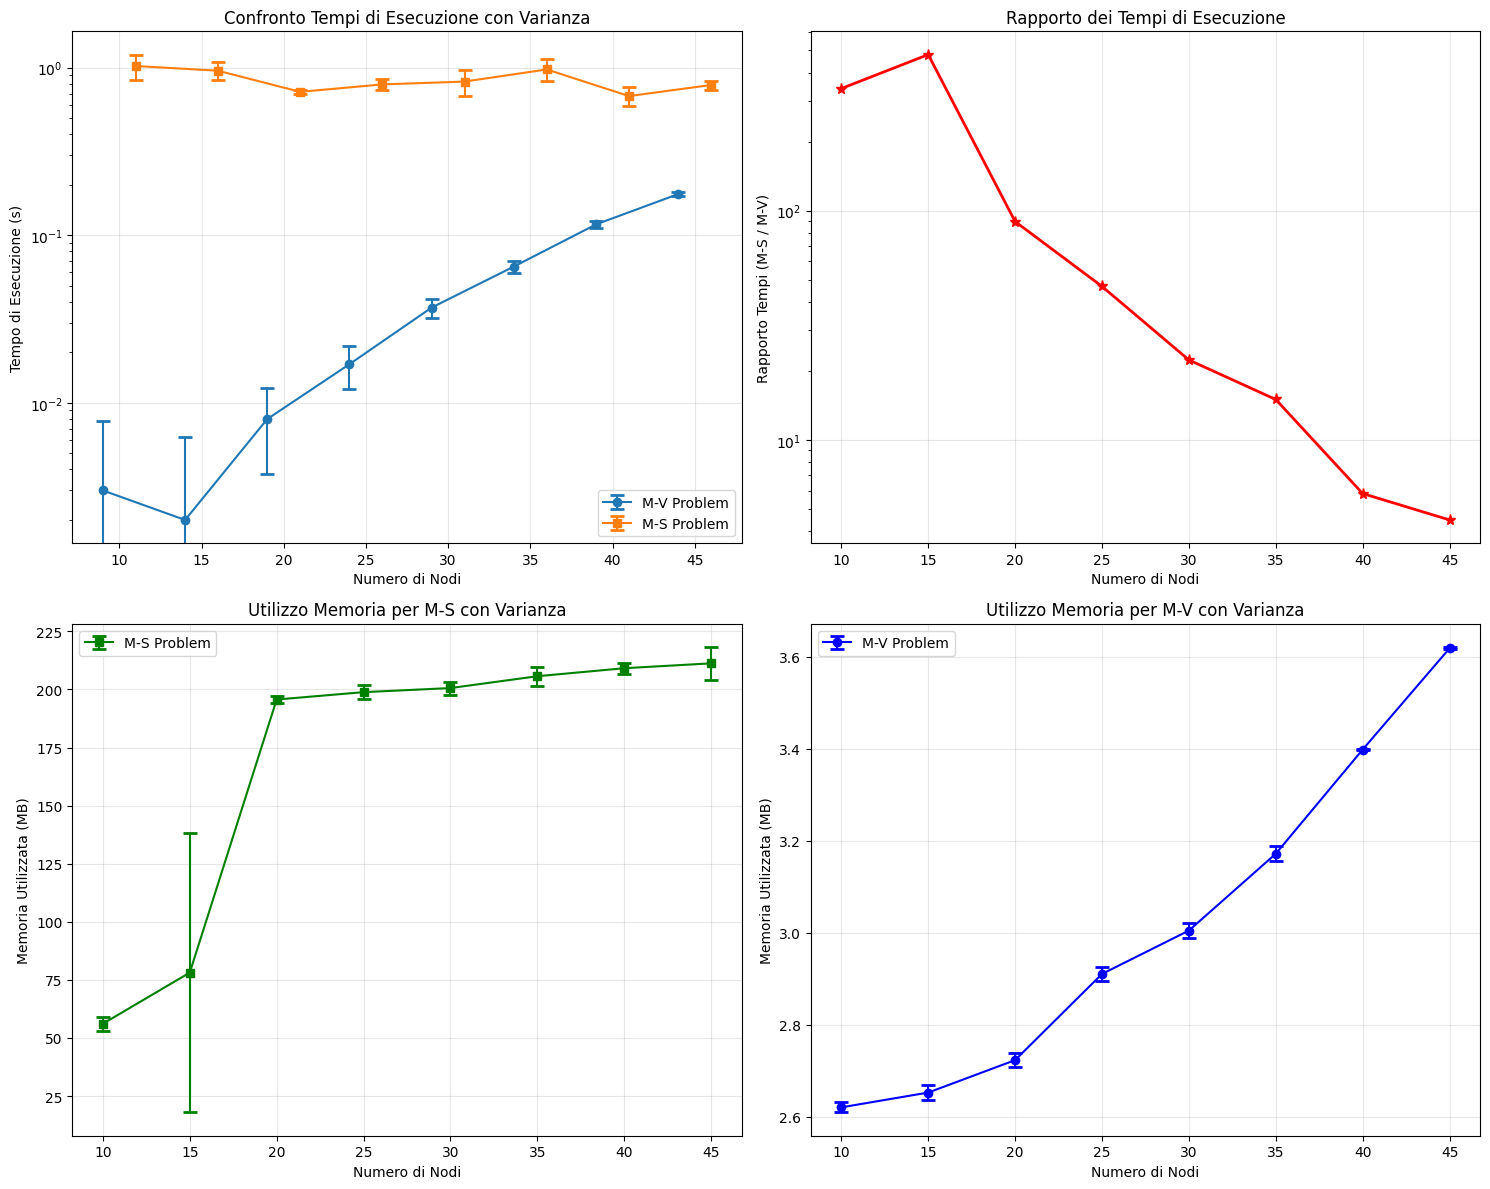

In [36]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Grafico 1: Tempi di esecuzione con barre di errore
x = np.array(dim)
width = 2  # Larghezza delle barre

ax1.errorbar(x - width / 2, mv_times_mean, yerr=mv_times_std,
             label='M-V Problem', marker='o', capsize=5, capthick=2)
ax1.errorbar(x + width / 2, ms_times_mean, yerr=ms_times_std,
             label='M-S Problem', marker='s', capsize=5, capthick=2)

ax1.set_xlabel('Numero di Nodi')
ax1.set_ylabel('Tempo di Esecuzione (s)')
ax1.set_title('Confronto Tempi di Esecuzione con Varianza')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Grafico 2: Rapporto tempi M-S / M-V
time_ratios = [ms / mv if mv > 0 else 0 for ms, mv in zip(ms_times_mean, mv_times_mean)]
ax2.plot(x, time_ratios, marker='*', color='red', linewidth=2, markersize=8)
ax2.set_xlabel('Numero di Nodi')
ax2.set_ylabel('Rapporto Tempi (M-S / M-V)')
ax2.set_title('Rapporto dei Tempi di Esecuzione')
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

# Grafico 3: Memoria utilizzata per M-S
ax3.errorbar(x, ms_memory_mean, yerr=ms_memory_std,
             label='M-S Problem', marker='s', capsize=5, capthick=2, color='green')
ax3.set_xlabel('Numero di Nodi')
ax3.set_ylabel('Memoria Utilizzata (MB)')
ax3.set_title('Utilizzo Memoria per M-S con Varianza')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Grafico 4: Memoria utilizzata per M-V
ax4.errorbar(x, mv_memory_mean, yerr=mv_memory_std,
             label='M-V Problem', marker='o', capsize=5, capthick=2, color='blue')
ax4.set_xlabel('Numero di Nodi')
ax4.set_ylabel('Memoria Utilizzata (MB)')
ax4.set_title('Utilizzo Memoria per M-V con Varianza')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Risultati Chiave
- **Andamento Tempo**: Lineare/Quadratico/Esponenziale? (Basato sui grafici)
- **Memoria**: Cresce in modo accettabile?
- **Punto Critico**: Scala massima gestibile con risorse disponibili.
